In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

from yellowbrick.classifier import ROCAUC
#from yellowbrick.datasets import load_game

# Load multi-class classification dataset
#X, y = load_game()

data = pd.read_csv(r"C:\Users\Owner\OneDrive - University of Bradford\Dissertation\Data\research_dataset.csv")

data["UUU"] = pd.to_numeric(data["UUU"], errors = 'coerce')
data["UUC"] = pd.to_numeric(data["UUC"], errors = 'coerce')

data = data.replace(np.nan, 0, regex=True)

data = data.reset_index()

data.head(2)


X =  np.array(data.iloc[:, 6:69])
y = np.array(data.iloc[:, 5])


# Encode the non-numeric columns
X = OrdinalEncoder().fit_transform(X)
y = LabelEncoder().fit_transform(y)

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Instaniate the classification model and visualizer
model = RidgeClassifier()
visualizer = ROCAUC(model, classes=["bct", "pln", "Inv", "Vrt"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

C:\Users\Owner\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


ModelError: could not decode [   0    1    2 ... 8811 8812 8813] y values to ['bct' 'pln' 'Inv' 'Vrt'] labels

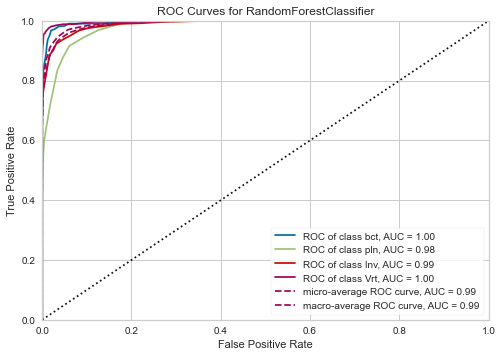

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [9]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=30)
model1.fit(X_train, y_train)

#model = RidgeClassifier()
visualizer = ROCAUC(model1, classes=["bct", "pln", "Inv", "Vrt"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

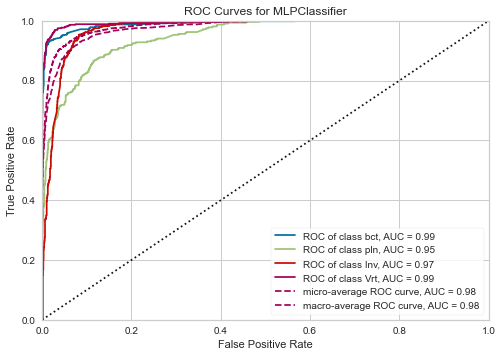

<AxesSubplot:title={'center':'ROC Curves for MLPClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [10]:
from sklearn.neural_network import MLPClassifier
model2 = MLPClassifier(hidden_layer_sizes = (10, 10, 10), max_iter=1000)
model2.fit(X_train, y_train.ravel())

visualizer = ROCAUC(model2, classes=["bct", "pln", "Inv", "Vrt"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()               

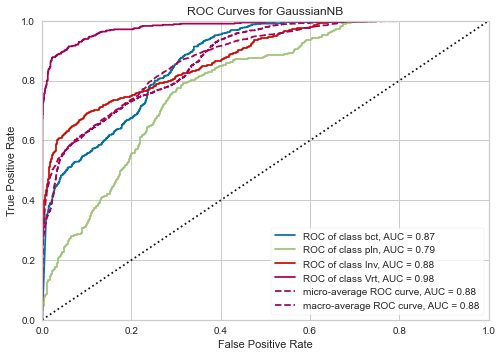

<AxesSubplot:title={'center':'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [13]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train, y_train.ravel())


visualizer = ROCAUC(model3, classes=["bct", "pln", "Inv", "Vrt"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()               

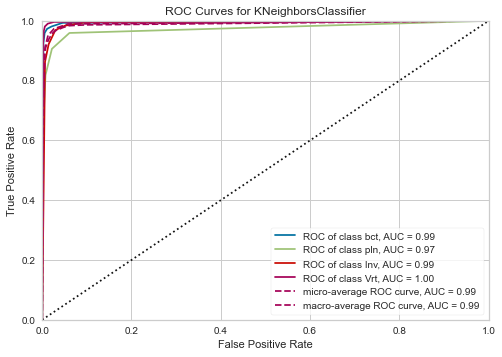

<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [14]:
from sklearn.neighbors import KNeighborsClassifier
model4 = KNeighborsClassifier(n_neighbors=5)
model4.fit(X_train, y_train)

visualizer = ROCAUC(model4, classes=["bct", "pln", "Inv", "Vrt"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()               

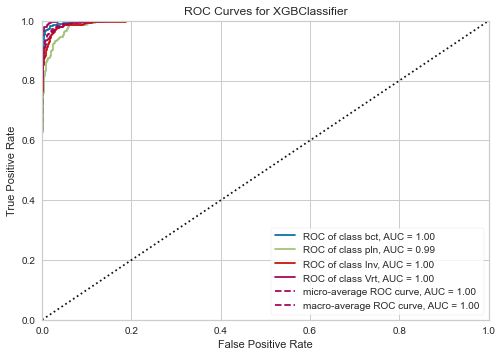

<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [17]:
from xgboost import XGBClassifier
model5 = XGBClassifier()
model5.fit(X_train, y_train, eval_metric="mlogloss", verbose=True)

visualizer = ROCAUC(model5, classes=["bct", "pln", "Inv", "Vrt"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure